<a href="https://colab.research.google.com/github/Kr9096/Machine-Learning-Projects/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Prediction**

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Analysis/winequality-red.csv")

In [ ]:
# Basic info about the data

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.sample(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1104,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4,6
660,7.2,0.52,0.07,1.4,0.074,5.0,20.0,0.9973,3.32,0.81,9.6,6


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EDA

In [ ]:
# Let's do some statistical analysis

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

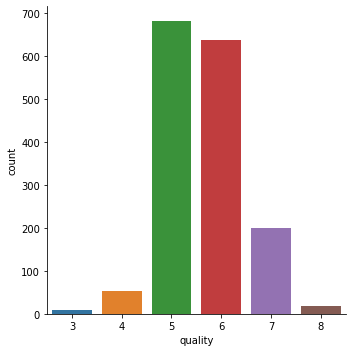

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="quality",data=df,kind="count")  # It is very clear that 5&6 counts are high.

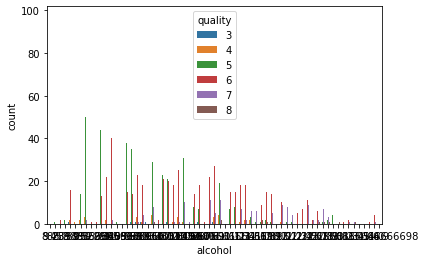

In [ ]:
sns.countplot(x="alcohol",hue = "quality",data=df)

In [ ]:
# Let's find the correlation between the variables

df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


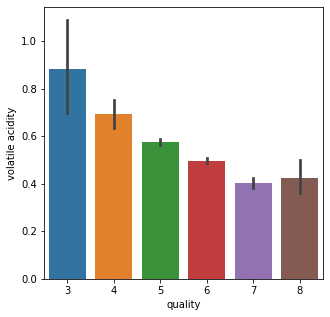

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y="volatile acidity",data=df)

# The volatile acidity is inversely proportional to quality
# If the acidity increases the wine quality dicreases

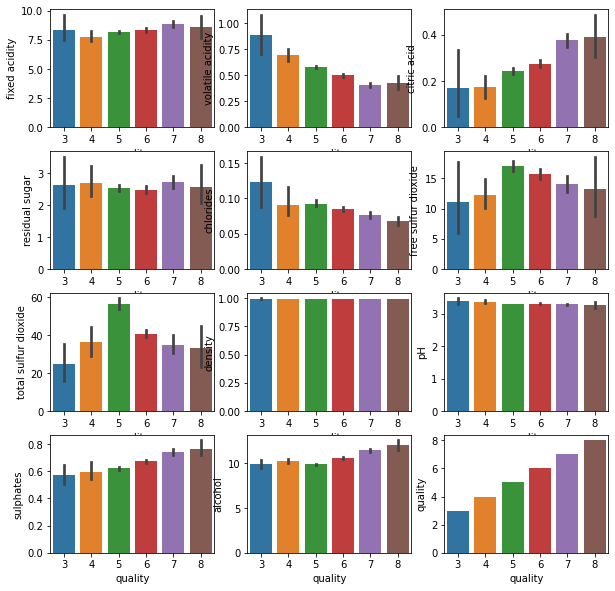

In [ ]:
# Lets plot barplot for all columns
plt.figure(figsize=(10,10))

for ind,i in enumerate(df.columns):
  plt.subplot(4,3,ind+1)
  sns.barplot(x='quality',y=i,data=df)  # This plot shows how the other factors effect the wine quality
  

In [ ]:
# To find the correlation 

In [ ]:
cor = df.corr()

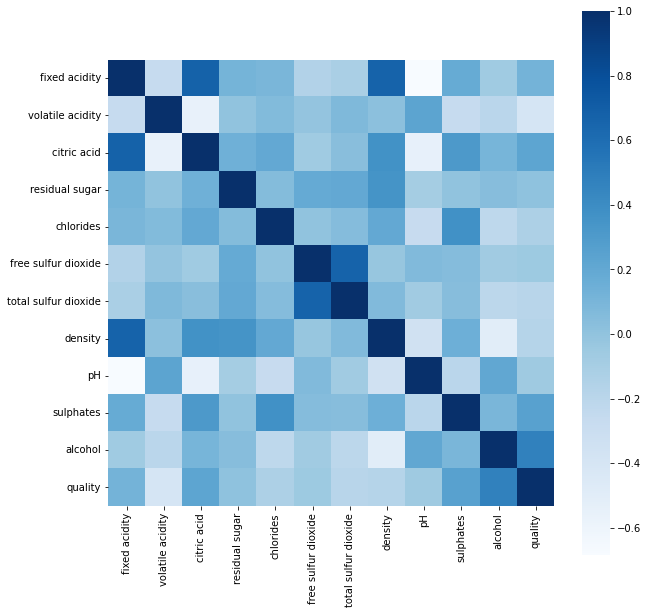

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,cbar = True, square =True, fmt = ".1f", annot_kws = {'size':0}, cmap = "Blues")

# Preprocessing

In [ ]:
X = df.drop("quality",axis=1)

In [ ]:
# Label Binarization, because we have continious values in dependentant variable
y = df["quality"].apply(lambda x: 1 if x>6 else 0)  

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify= y,random_state=7)


# Model building

In [ ]:
# We are going to use a random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pdct = rf.predict(X_test)
accuracy_score(rf_pdct,y_test)

0.928125

In [ ]:
# SVM classifier

from sklearn import svm
svm_cl = svm.SVC(kernel = "linear")
svm_cl.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
svm_pdct = svm_cl.predict(X_test)
accuracy_score(svm_pdct,y_test)

0.865625

In [ ]:
# It is very clear that RandomForest performs well compare with SVM Classifier

# Let's do a prediction for single value

In [ ]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [ ]:
inp_d = (7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)

# Convert the input data into array

inp_array = np.asarray(inp_d)

# Reshape the array, because we are predicting only 1
inp_array = inp_array.reshape(1,-1)

# Lets predict with the RF

inp_reshape = inp_array.reshape(1,-1)  # For predicting only 1 value

svm_cl.predict(inp_reshape)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

Which is True, IF the value is < 6 = 0.